**Module 6  APIs**
- Perform tasks using new Python libraries and modules.

- Retrieve and use data from an API "get" request to a server.

- Retrieve and store values from a JSON array.

- Use try and except blocks to resolve errors.

- Write Python functions.

- Create scatter plots using the Matplotlib library, and apply styles and features to a plot.

- Perform linear regression, and add regression lines to scatter plots.

- Create heatmaps, and add markers using the Google Maps API.

**Project Plan**
Basic Project Plan


Task: Collect and analyze weather data across cities worldwide.

Purpose: PlanMyTrip will use the data to recommend ideal hotels based on clients' weather preferences.

Method: Create a Pandas DataFrame with 500 or more of the world's unique cities and their weather data in real time. This process will entail collecting, analyzing, and visualizing the data.

The analysis of the data will be split into three main parts, or stages.

Collect the Data

- Use the NumPy module to generate more than 1,500 random latitudes and longitudes.

- Use the citipy module to list the nearest city to the latitudes and longitudes.

- Use the OpenWeatherMap API to request the current weather data from each unique city in your list.

- Parse the JSON data from the API request.

- Collect the following data from the JSON file and add it to a DataFrame:

- City, country, and date

- Latitude and longitude

- Maximum temperature

- Humidity

- Cloudiness

- Wind speed

- Exploratory Analysis with Visualization

Create scatter plots of the weather data for the following comparisons:
- Latitude versus temperature

- Latitude versus humidity

- Latitude versus cloudiness

- Latitude versus wind speed

- Determine the correlations for the following weather data:

- Latitude and temperature

- Latitude and humidity

- Latitude and cloudiness

- Latitude and wind speed

- Create a series of heatmaps using the Google Maps and Places API that showcases the following:

- Latitude and temperature

- Latitude and humidity

- Latitude and cloudiness

- Latitude and wind speed

- Visualize Travel Data

Create a heatmap with pop-up markers that can display information on specific cities based on a customer's travel preferences. Complete these steps:


- Filter the Pandas DataFrame based on user inputs for a minimum and maximum temperature.

- Create a heatmap for the new DataFrame.

- Find a hotel from the cities' coordinates using Google's Maps and Places API, and Search Nearby feature.

- Store the name of the first hotel in the DataFrame.

- Add pop-up markers to the heatmap that display information about the city, current maximum temperature, and a hotel in the city.

#### Collect the data


In [22]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

Add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.

In the next cell, add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500 )
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500 )
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

Add citipy.   From Module 6.1.5

In [4]:
# import citipy
from citipy import citipy


In [5]:
#create a list for holding the cities.
cities = []
#Indentify the nearest city for each latitude adn longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city in unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count.
len(cities)
    

611

##### The JavaScript Object Notation Format for API Data - have no idea what happened to this string of thought.
To retrieve data from a website, make a "request," which returns data in a text format, not in a tab- or comma-separated file.

One format used to parse data is JavaScript Object Notation (JSON). The JSON format is also referred to as an "object" or "JSON object." The data inside a JSON object opens and closes with curly braces, much like a Python dictionary. Inside the JSON object is a collection of dictionaries and arrays.


#### Psudeocode -  do the following:

1. Import dependencies and initialize counters and an empty list that will hold the weather data.

2. Loop through the cities list.

3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.

4. Build the city_url or endpoint for each city.

5. Log the URL and the record and set numbers.

6. Make an API request for each city.

7. Parse the JSON weather data for the following:
    - City, country, and date

    - Latitude and longitude

    - Maximum temperature

    - Humidity

    - Cloudiness

    - Wind speed

    - Add the data to a list in a dictionary format and then convert the list to a DataFrame.


##### Dependencies

In [19]:
#import dependencies, initialize empty lists and counters.

# Import the datetime module from the datetime library.
from datetime import datetime

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters.
record_count = 1 
set_count = 1

from config import weather_api_key

url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key


Beginning Data Retrieval     
-----------------------------


In [7]:
## this would require 2 loops.  See next cel for better method.

## loop through all the cities in our list.
# for i in range(len(cities)):
    
#     #Group cities in sets of 50 for logging purposes.
#     if (i%50==0 and i>= 50):
#         set_count+=1
#         record_count = 1
#         #Create endpoint URL with each city.
#         city_url = url = "&q=" + cities [i]

The Enumerate method -  new code for loops

In [31]:
# Loop through all the cities in our list.
import sys
import requests
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i%50==0 and i>= 50):
        set_count+=1
        record_count = 1
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+") 
     
    # Log the URL, record, and set numbers and the city.   
    print(f"Processing Record {record_count} of Set {set_count}| {city}")    
    
   #add 1 to the record count.
    record_count += 1
        
# Run an API request for each of the cities.
    try:
         # Parse the JSON and retrieve data. 
            print(city_url)
            city_weather = requests.get(city_url).json()

            
            #Parse out the needed data
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp =city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            
            #convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y=%m-%d %H:%M:%S')
            
            #append the city information into the city_data list.
            city_data.append({"City":city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                                "Max Temp": city_max_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind,
                                "Country": city_country,
                                "Date": city_date})
            
    #if an error is expereinced, skip the city
    except:
            print("City not found.  Skipping...")
            pass
    
    #Indicate that Data loading is complete
    print("------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")
            
    

Processing Record 27 of Set 61| winona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=winona
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 61| agadir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=agadir
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 61| ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=ushuaia
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 61| opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=opuwo
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 61| pevek
http://api.openweathermap.

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 62 of Set 61| san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=san+patricio
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 63 of Set 61| diapaga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=diapaga
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 64 of Set 61| barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=barentsburg
City not found.  Skipping...
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 65 of Set 61| torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=torbay
-----------

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 62| bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=bonthe
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 62| leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=leningradskiy
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 62| cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=cape+town
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 62| havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=havelock
------------------------
Data Retrieval 

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 63| port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=port+hedland
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 63| bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=bathsheba
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 63| byron bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=byron+bay
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 63| ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=ixtapa
------------------------
Data Retrieval Comp

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 63| cleveland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=cleveland
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 63| kolarovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=kolarovo
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 63| luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=luderitz
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 63| paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=paita
------------------------
Data Retrieval Complete    

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 64| severnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=severnoye
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 64| quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=quelimane
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 64| londoko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=londoko
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 64| sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=sao+filipe
------------------------
Data Retrieval Co

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 65| baruun-urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=baruun-urt
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 65| ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=ribeira+grande
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 65| clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=clyde+river
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 65| mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=mount+gambier
----------------

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 65| taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=taltal
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 65| paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=paamiut
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 65| belyy yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=belyy+yar
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 65| tombouctou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=tombouctou
------------------------
Data Retrieval Complete

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 66| sompeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=sompeta
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 66| hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=hambantota
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 66| aripuana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=aripuana
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 66| tevaitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=tevaitoa
------------------------
Data Retrieval Comple

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 67| meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=meulaboh
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 67| ilam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=ilam
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 67| svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=svetlogorsk
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 67| brahmapuri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=brahmapuri
City not found.  Skipping...
-----------------

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 67| machachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=machachi
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 68| angoche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=angoche
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 68| poya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=poya
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 68| gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=gamba
------------------------
Data Retrieval Complete      
------------

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 68| sackville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=sackville
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 68| jaromerice nad rokytnou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=jaromerice+nad+rokytnou
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 68| aqtobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=aqtobe
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 68| taganak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=taganak
----------------------

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 69| hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=hasaki
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 69| lakatoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=lakatoro
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 69| zachepylivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=zachepylivka
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 69| aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=aklavik
------------------------
Data Retrieval Comple

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 70| esna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=esna
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 70| elizabethton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=elizabethton
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 70| havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=havoysund
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 70| yablonovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=yablonovo
------------------------
Data Retrieval Complete

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 70| lagoa vermelha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=lagoa+vermelha
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 70| aflu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=aflu
City not found.  Skipping...
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 70| labuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=labuan
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 70| lamar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=lamar
------------------------


------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 71| verkhne-katunskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=verkhne-katunskoye
City not found.  Skipping...
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 71| tlanchinol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=tlanchinol
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 71| hibbing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=hibbing
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 71| toliary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=toliary

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 72| petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=petropavlovsk-kamchatskiy
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 72| erikoussa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=erikoussa
City not found.  Skipping...
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 72| kasongo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=kasongo
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 72| taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf74

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 72| zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=zhangye
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 72| tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=tual
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 72| leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=leshukonskoye
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 72| yelizovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=yelizovo
------------------------
Data Retrieval Complete

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Winona,43.9666,-91.7668,42.01,48,1,19.57,US,2021=03-28 17:43:38
1,Agadir,30.4202,-9.5982,78.80,31,14,3.44,MA,2021=03-28 17:46:09
2,Ushuaia,-54.8000,-68.3000,46.40,61,40,28.77,AR,2021=03-28 17:46:09
3,Opuwo,-18.0607,13.8400,75.29,54,89,3.47,NA,2021=03-28 17:41:16
4,Pevek,69.7008,170.3133,-21.41,99,37,1.23,RU,2021=03-28 17:45:33
...,...,...,...,...,...,...,...,...,...
553,Valley,45.1277,-116.1262,53.01,69,1,3.44,US,2021=03-28 17:49:31
554,Half Moon Bay,37.4636,-122.4286,64.99,67,1,4.54,US,2021=03-28 17:49:31
555,Zhigansk,66.7697,123.3711,-1.48,99,89,2.66,RU,2021=03-28 17:47:42
556,Praya,14.9215,-23.5087,73.40,60,40,28.77,CV,2021=03-28 17:49:31


In [35]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Winona,US,2021=03-28 17:43:38,43.9666,-91.7668,42.01,48,1,19.57
1,Agadir,MA,2021=03-28 17:46:09,30.4202,-9.5982,78.80,31,14,3.44
2,Ushuaia,AR,2021=03-28 17:46:09,-54.8000,-68.3000,46.40,61,40,28.77
3,Opuwo,NA,2021=03-28 17:41:16,-18.0607,13.8400,75.29,54,89,3.47
4,Pevek,RU,2021=03-28 17:45:33,69.7008,170.3133,-21.41,99,37,1.23
5,Kapaa,US,2021=03-28 17:42:22,22.0752,-159.3190,73.40,68,90,19.57
6,Winona,US,2021=03-28 17:43:38,43.9666,-91.7668,42.01,48,1,19.57
7,Agadir,MA,2021=03-28 17:46:09,30.4202,-9.5982,78.80,31,14,3.44
8,Ushuaia,AR,2021=03-28 17:46:09,-54.8000,-68.3000,46.40,61,40,28.77
9,Opuwo,NA,2021=03-28 17:41:16,-18.0607,13.8400,75.29,54,89,3.47


In [36]:
# Create the output file (CSV).  From section 6.2.7 mid page
output_data_file = "weather_data/cities.csv"

#Export the City_Data in a CSV
city_data_df.to_csv(output_data_file, index_label= "city_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

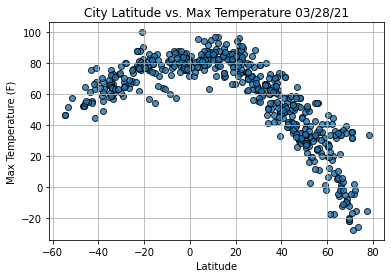

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

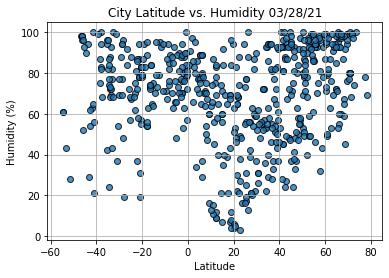

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

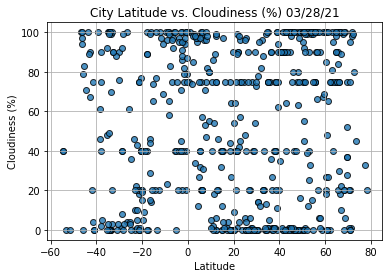

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()